<a href="https://colab.research.google.com/github/thedeenun/CS345_Final-project/blob/main/CS345_Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Classification

##ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Income Dataset จาก https://www.kaggle.com/mastmustu/income ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับลักษณะของประชากรที่มีรายได้มากกว่าหรือน้อยกว่า 50K

โดย Data set ที่เลือกมา มีลักษณะดังนี้

**Train Set**
* Data set characteristic : Multivariate
* Attribute characteristic : Integer, Object
* จำนวน missing values : 5767
* จำนวน Instance : 43958 
* จำนวน Attribute: 15 ดังนี้
  1. age : อายุ
  2. workclass : ประเภทของการทำงาน 
  3. fnlwgt : final weight หรือ จำนวนของกลุ่มประชากรเป้าหมาย
  4. education : ประเภทการศึกษา
  5. educational-num : ตัวเลขของการศึกษา
  6. marital-status : สถานะการสมรส
  7. occupation : อาชีพ
  8. relationship	: ความสัมพันธ์
  9. race : เชื้อชาติ
  10. gender : เพศสภาพ
  11. capital-gain : ผลกำไรจากส่วนต่างของราคาหลักทรัพย์
  12. capital-loss : ผลขาดทุนจากส่วนต่างของราคาหลักทรัพย์
  13. hours-per-week : ชั่วโมงการทำงานต่อสัปดาห์
  14. native-country	: ประเทศแต่กำเนิด
  15. income_>50K : รายได้มากกว่า 50K


**Test Set**
* Data set characteristic : Multivariate
* Attribute characteristic : Integer, Object
* จำนวน missing values : 0
* จำนวน Instance : 899 
* จำนวน Attribute: 14 ดังนี้
  1. age : อายุ
  2. workclass : ประเภทของการทำงาน 
  3. fnlwgt : final weight หรือ จำนวนของกลุ่มประชากรเป้าหมาย
  4. education : ประเภทการศึกษา
  5. educational-num : ตัวเลขของการศึกษา
  6. marital-status : สถานะการสมรส
  7. occupation : อาชีพ
  8. relationship	: ความสัมพันธ์
  9. race : เชื้อชาติ
  10. gender : เพศสภาพ
  11. capital-gain : ผลกำไรจากส่วนต่างของราคาหลักทรัพย์
  12. capital-loss : ผลขาดทุนจากส่วนต่างของราคาหลักทรัพย์
  13. hours-per-week : ชั่วโมงการทำงานต่อสัปดาห์
  14. native-country	: ประเทศแต่กำเนิด


  โดยจะใช้ลักษะของข้อมูลทั้งหมดของข้อมูลมาทำ Classification เพื่อทำนายว่าจะมีจำนวนผู้ที่มีรายได้มากกว่าหรือน้อยกว่า 5 หมื่น (income_>50K) เป็นเท่าใดบ้าง

*   Class label: income_>50K




# ขั้นตอนการเตรียมชุดข้อมูล

Import module ต่าง ๆ ที่จำเป็นต้องใช้

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import data file ทั้งสองโดย


*   train.csv เก็บไว้ในตัวแปร df_train
*   test.csv เก็บไว้ในตัวแปร df_test






In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

แสดงผลประเภทของข้อมูลของแต่ละคอมลัมน์จาก df_train

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


ใช้ isnull() เพื่อตรวจสอบว่าข้อมูลใน df_train มีค่า null หรือไม่

In [4]:
df_train.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

ทำการ drop แถวที่มีค่า null ใน df_train ทั้งหมด

In [5]:
df_train.dropna(axis=0, inplace=True)

แสดงผลประเภทของข้อมูลของแต่ละคอมลัมน์จาก df_test

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


ใช้ isnull() เพื่อตรวจสอบว่าข้อมูลใน df_test มีค่า null หรือไม่

In [7]:
df_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

ตรวจสอบ Class label จาก df_train ว่าเป็น Class balance หรือ Class imbalance

In [8]:
df_train['income_>50K'].value_counts()

0    30635
1    10092
Name: income_>50K, dtype: int64

จำนวนของ income_>50K ของทั้งสอง class มีไม่เท่ากัน จึงสรุปได้ว่า df_train เป็น Class imbalance

#ขั้นตอนการแปลงข้อมูลประเภท Nominal หรือ Ordinal ให้เป็น Numerical (One hot encoding)

&emsp;*การทำแปลงข้อมูลประเภท Nominal หรือ Ordinal ให้เป็น Numerical* หรือเรียกว่าการทำ One hot encoding คือ การแปลงข้อมูลที่เป็นประเภท String หรือ Objict ให้เป็นค่า 0 หรือ 1 โดยจะต้องแยกย่อยคอลัมน์ที่มีอยู่ให้เป็นหลาย ๆ คอลัมน์ตามจำนวนลักษณะ(Attributes) ที่มีอยู่ในคอลัมน์นั้น เช่น คอลัมน์ gender มีลักษณะคือ Male และ Female หลังจากทำ One hot encoding คอลัมน์ gender จะหายไปกลายเป็นคอลัมน์ gender_Male กับ gender_Female แทน และถ้าหากแถวของข้อมูลนั้นแต่เดิมมี gender เป็น Male ก็จะเช็ตค่า 1 ในคอลัมน์ gender_Male และเซ็ตค่า 0 ในคอลัมน์ gender_Female

> Pandas มีฟังก์ชั่น get_dummies ที่สามารถทำ One hot encoding ได้

&emsp;แต่เนื่องจาก df_train และ df_test มีลักษณะที่อยู่ในแต่ละคอลัมน์ที่ไม่เหมือนกันอยู่ จึงไม่สามารถใช้ get_dummies เพื่อทำ One hot encoding ได้ จึงทำการใช้วิธีต่อไปนี้เพื่อทำ One hot encoding สำหรับชุดข้อมูลทั้งสอง



In [9]:
list_columns_onehotendcode = []
list_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for i in  list_columns:
  for j in set(df_train[i]):
    temp = i+"_"+j
    if j not in list_columns_onehotendcode:
      list_columns_onehotendcode.append(temp)
  for j in set(df_test[i]):
    temp = i+"_"+j
    if j not in list_columns_onehotendcode:
      list_columns_onehotendcode.append(temp)    

print(list_columns_onehotendcode)

['workclass_Self-emp-inc', 'workclass_Private', 'workclass_Federal-gov', 'workclass_State-gov', 'workclass_Local-gov', 'workclass_Without-pay', 'workclass_Self-emp-not-inc', 'workclass_Self-emp-inc', 'workclass_Private', 'workclass_Federal-gov', 'workclass_State-gov', 'workclass_Local-gov', 'workclass_Self-emp-not-inc', 'education_7th-8th', 'education_HS-grad', 'education_9th', 'education_Assoc-voc', 'education_Bachelors', 'education_Preschool', 'education_11th', 'education_5th-6th', 'education_10th', 'education_Masters', 'education_1st-4th', 'education_Prof-school', 'education_12th', 'education_Doctorate', 'education_Assoc-acdm', 'education_Some-college', 'education_7th-8th', 'education_HS-grad', 'education_Assoc-voc', 'education_9th', 'education_Bachelors', 'education_Preschool', 'education_11th', 'education_5th-6th', 'education_Masters', 'education_10th', 'education_1st-4th', 'education_Prof-school', 'education_12th', 'education_Doctorate', 'education_Assoc-acdm', 'education_Some-co

เพิ่มคอลัมน์ย่อยที่ได้จากการทำ one hot encoding เข้าไปใน df_train และ df_test จากนั้นเซ็ตค่าให้เป็น 0 ก่อน

In [17]:
df_train[list_columns_onehotendcode] = 0
df_test[list_columns_onehotendcode] = 0

เซ็ตค่าเท่ากับ 1 สำหรับคอลัมน์ที่มีลักษณะจาก list_colums_onehotencode ปรากกฎอยู่

In [18]:
for i in list_columns:
  for j in list_columns_onehotendcode:
    df_train.loc[df_train[i].str.contains(j,case=False),j]=1
    df_test.loc[df_test[i].str.contains(j,case=False),j]=1

ทำการ drop คอลัมน์ดั้งเดิมก่อนทำ One hot encoding ทิ้งไป

In [19]:
df_train.drop(columns=list_columns, inplace=True)
df_test.drop(columns=list_columns, inplace=True)

จำนวนคอลัมน์ของ df_train เพิ่มขึ้นมาจาก 15 เป็น 105

จำนวนคอลัมน์ของ df_test เพิ่มขึ้นมาจาก 14 เป็น 104 เนื่องจาก df_test ไม่มี class label (income_>50K) อยู่ด้วย


In [20]:
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (40727, 105)
df_test: (899, 104)


In [21]:
df_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Self-emp-inc,workclass_Private,workclass_Federal-gov,workclass_State-gov,workclass_Local-gov,workclass_Without-pay,workclass_Self-emp-not-inc,education_7th-8th,education_HS-grad,education_9th,education_Assoc-voc,education_Bachelors,education_Preschool,education_11th,education_5th-6th,education_10th,education_Masters,education_1st-4th,education_Prof-school,education_12th,education_Doctorate,education_Assoc-acdm,education_Some-college,marital-status_Married-AF-spouse,marital-status_Separated,marital-status_Married-civ-spouse,marital-status_Widowed,marital-status_Never-married,marital-status_Married-spouse-absent,marital-status_Divorced,occupation_Transport-moving,occupation_Machine-op-inspct,occupation_Exec-managerial,...,native-country_Jamaica,native-country_Dominican-Republic,native-country_Vietnam,native-country_Nicaragua,native-country_Taiwan,native-country_England,native-country_El-Salvador,native-country_United-States,native-country_Trinadad&Tobago,native-country_Ecuador,native-country_Honduras,native-country_Cambodia,native-country_Holand-Netherlands,native-country_Iran,native-country_Germany,native-country_Mexico,native-country_India,native-country_Guatemala,native-country_Puerto-Rico,native-country_Yugoslavia,native-country_South,native-country_Outlying-US(Guam-USVI-etc),native-country_Ireland,native-country_Greece,native-country_Haiti,native-country_France,native-country_Cuba,native-country_Philippines,native-country_Peru,native-country_Japan,native-country_Hong,native-country_Poland,native-country_Scotland,native-country_Columbia,native-country_Hungary,native-country_China,native-country_Portugal,native-country_Canada,native-country_Thailand,native-country_Laos
0,67,366425,16,99999,0,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17,244602,8,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31,174201,13,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,58,110199,4,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,149248,10,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Self-emp-inc,workclass_Private,workclass_Federal-gov,workclass_State-gov,workclass_Local-gov,workclass_Without-pay,workclass_Self-emp-not-inc,education_7th-8th,education_HS-grad,education_9th,education_Assoc-voc,education_Bachelors,education_Preschool,education_11th,education_5th-6th,education_10th,education_Masters,education_1st-4th,education_Prof-school,education_12th,education_Doctorate,education_Assoc-acdm,education_Some-college,marital-status_Married-AF-spouse,marital-status_Separated,marital-status_Married-civ-spouse,marital-status_Widowed,marital-status_Never-married,marital-status_Married-spouse-absent,marital-status_Divorced,occupation_Transport-moving,occupation_Machine-op-inspct,occupation_Exec-managerial,occupation_Craft-repair,...,native-country_Jamaica,native-country_Dominican-Republic,native-country_Vietnam,native-country_Nicaragua,native-country_Taiwan,native-country_England,native-country_El-Salvador,native-country_United-States,native-country_Trinadad&Tobago,native-country_Ecuador,native-country_Honduras,native-country_Cambodia,native-country_Holand-Netherlands,native-country_Iran,native-country_Germany,native-country_Mexico,native-country_India,native-country_Guatemala,native-country_Puerto-Rico,native-country_Yugoslavia,native-country_South,native-country_Outlying-US(Guam-USVI-etc),native-country_Ireland,native-country_Greece,native-country_Haiti,native-country_France,native-country_Cuba,native-country_Philippines,native-country_Peru,native-country_Japan,native-country_Hong,native-country_Poland,native-country_Scotland,native-country_Columbia,native-country_Hungary,native-country_China,native-country_Portugal,native-country_Canada,native-country_Thailand,native-country_Laos
0,39,327120,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,32,123253,12,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,232628,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19,374262,8,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,311231,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#ขั้นตอนการเตรียมข้อมูลสอน ข้อมูลทวนสอบ และ ข้อมูลทดสอบ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df_train2.drop(columns='income_>50K').values
y = df_train2.loc[:,['income_>50K']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ขั้นตอนการสร้างและเปรียบเทียบโมเดล

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

Text(0, 0.5, 'Mean Error')

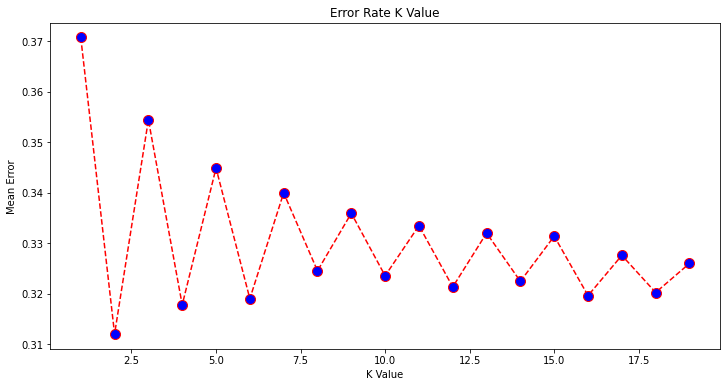

In [ ]:
error=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
models.append(('SVM', SVC(kernel='linear')))
models.append(('Neural Network', MLPClassifier(solver='lbfgs', hidden_layer_sizes=53)))

KNN: 0.795875
SVM: 0.797320
Neural Network: 0.817564



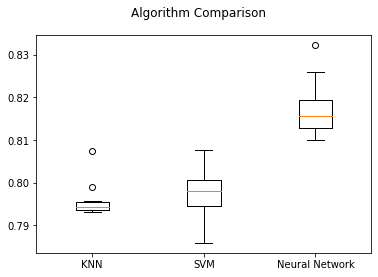

In [ ]:
results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f' % (name, cv_results.mean()))

print()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
print("Accuracy after prediction")
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  result = metrics.accuracy_score(y_test, y_pred)
  print('%s: %f' % (name, result))

Accuracy after prediction
KNN: 0.789590
SVM: 0.802357
Neural Network: 0.813651


# ขั้นตอนการเลือกโมเดลในการจำแนกข้อมูล

In [ ]:
target_names = ['class 0', 'class 1']

In [ ]:
NeuralNet = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(53,28), max_iter=100)
NeuralNet.fit(X_train, y_train)
y_pred_NeuralNet = NeuralNet.predict(X_test)
print("Confustion Matrix: \n",confusion_matrix(y_test, y_pred_NeuralNet))
print()
print(classification_report(y_test, y_pred_NeuralNet, target_names=target_names))
print()
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Confustion Matrix: 
 [[2884  170]
 [ 584  435]]

              precision    recall  f1-score   support

     class 0       0.83      0.94      0.88      3054
     class 1       0.72      0.43      0.54      1019

    accuracy                           0.81      4073
   macro avg       0.78      0.69      0.71      4073
weighted avg       0.80      0.81      0.80      4073


Accuracy:  0.8185612570586791


Text(0, 0.5, 'Accuracy')

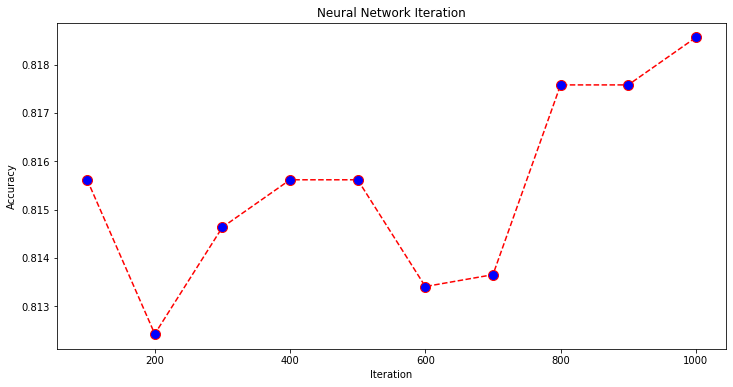

In [ ]:
accuracy = []
for i in range(100, 1100, 100):
  model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=53, max_iter=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  #print('iter %d: %f' % (i, metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(12, 6))
plt.plot(range(100, 1100, 100), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Neural Network Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

#ขั้นตอนการทดสอบกับชุดข้อมูลทดสอบ

In [ ]:
new_testset = df_test2.values
new_testset = scaler.transform(new_testset)
y_pred_testset = NeuralNet.predict(new_testset)
new_testset = df_test2.copy()
new_testset['income_>50K'] = y_pred_testset

In [ ]:
new_testset['income_>50K'].value_counts()

0    757
1    142
Name: income_>50K, dtype: int64

# ดาวน์โหลด Data set หลังการทำ Pre-process 

In [ ]:
df_train2.to_csv('df_train2.csv')
df_test2.to_csv('df_test2.csv')
testset_with_class.to_csv('testset_with_class.csv')

# รายชื่อผู้จัดทำ

นายอาดีนัน อับดุลลี 6209650719